In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/apr_11-15.csv')
dft.head()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-04-11,1248800449534230528,As per an estimate India may lose $98 Billion ...,['Coronavirus'],3.0,{'country_code': 'in'},per estimate india may lose billion due days c...,-1
1,2020-04-11,1248800515627945984,United States becomes the first country to rec...,['Coronavirus'],558.0,"{'country_code': 'in', 'state': 'Maharashtra'...",united states becomes first country record cor...,-1
2,2020-04-11,1248801197047156739,PM @narendramodi will hold video conference wi...,"['coronavirus', 'CoronavirusOutbreak']",46.0,"{'country_code': 'in', 'state': 'Delhi'}",pm hold video conference chief ministers today...,0
3,2020-04-11,1248804422005616641,"According to Johns Hopkins University, US reco...",['coronavirus'],1.0,{'country_code': 'in'},according johns hopkins university us recorded...,1
4,2020-04-11,1248804677447061504,161330 #COVID19 samples tested so far in India...,"['COVID19', 'ICMR']",18.0,{'country_code': 'in'},covid samples tested far india positive cases ...,1


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(413852, 8)


,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-04-11,1248800449534230528,As per an estimate India may lose $98 Billion ...,['Coronavirus'],3.0,{'country_code': 'in'},per estimate india may lose billion due days c...,-1
1,2020-04-11,1248800515627945984,United States becomes the first country to rec...,['Coronavirus'],558.0,"{'country_code': 'in', 'state': 'Maharashtra'...",united states becomes first country record cor...,-1
2,2020-04-11,1248801197047156739,PM @narendramodi will hold video conference wi...,"['coronavirus', 'CoronavirusOutbreak']",46.0,"{'country_code': 'in', 'state': 'Delhi'}",pm hold video conference chief ministers today...,0
3,2020-04-11,1248804422005616641,"According to Johns Hopkins University, US reco...",['coronavirus'],1.0,{'country_code': 'in'},according johns hopkins university us recorded...,1
4,2020-04-11,1248804677447061504,161330 #COVID19 samples tested so far in India...,"['COVID19', 'ICMR']",18.0,{'country_code': 'in'},covid samples tested far india positive cases ...,1


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
413847,2020-04-15,1250421960158240779,BBC World okayyy. Way to go Danish! Auntie ver...,[],11.0,"{'country_code': 'in', 'state': 'Rajasthan', ...",bbc world okayyy way go danish ! auntie proud ...,1
413848,2020-04-15,1250456895816486913,I’m sure none of the journalists will point at...,[],2.0,{'country_code': 'in'},sure none journalists point great satraps hail...,1
413849,2020-04-15,1250353800902148099,@indiatvnews It's my humble request to @indiat...,['corona'],0.0,"{'country_code': 'in', 'state': 'Bihar'}",humble request please share grandfather poem c...,1
413850,2020-04-15,1250324591848722432,"Okay, well done. Now what about action against...",[],0.0,{'country_code': 'in'},okay well done action abp majha news sensation...,1
413851,2020-04-15,1250341716302786563,@Azaadiyan @Gowharsgr @cjwerleman You'll die i...,[],0.0,"{'country_code': 'in', 'state': 'Himachal Pra...",die weeks covid worry anything,-1


In [ ]:
print(df.shape)
df.isnull().sum()

(413852, 8)


date             0
id               0
text             0
hashtags         8
retweet_count    8
location         8
cleaned          0
sentiment        0
dtype: int64

In [ ]:
!pip install -U pywsd

Requirement already up-to-date: pywsd in /usr/local/lib/python3.6/dist-packages (1.2.4)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0    per estimate india may lose billion due days c...
1    united states becomes first country record cor...
2    pm hold video conference chief ministers today...
3    according johns hopkins university us recorded...
4    covid samples tested far india positive cases ...
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

413852


'per estimate india may lose billion due days coronavirus lockdown'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

Warming up PyWSD (takes ~10 secs)... took 5.617275953292847 secs.


In [ ]:
t_clean[0]

['per',
 'estimate',
 'india',
 'may',
 'lose',
 'billion',
 'due',
 'day',
 'coronavirus',
 'lockdown']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

per


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

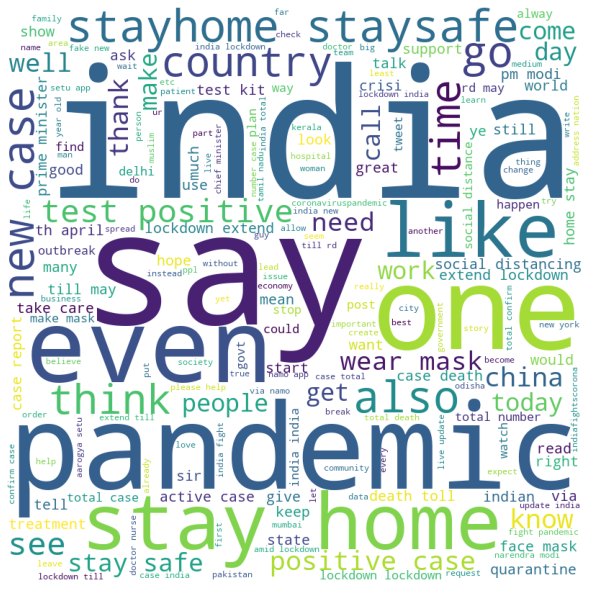

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['per estimate india may lose billion due day coronavirus lockdown',
 'united state becomes first country record coronavirus death one day fatalities past hour accord john hopkins university tally afp news agency',
 'pm hold video conference chief minister today discuss coronavirus pandemic expect take call extend lockdown coronavirusoutbreak',
 'accord john hopkins university u record coronavirus death single day total number death country nearly',
 'covid sample test far india positive case till date sample test april india find positive per icmr check live update']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['aarogya setu',
 'aarogya setu app',
 'aarogyasetu app',
 'across country',
 'across globe',
 'across india',
 'across state',
 'across world',
 'action take',
 'active case',
 'active case cure',
 'active case total',
 'address concern',
 'address concern bank',
 'address nation',
 'address nation tomorrow',
 'amid crisis',
 'amid lockdown',
 'amid outbreak',
 'amid pandemic',
 'amidst lockdown',
 'amidst pandemic',
 'andhra pradesh',
 'animal pandemic',
 'announce lockdown',
 'antibody test',
 'app fight',
 'app help',
 'app help poor',
 'apple google',
 'april india',
 'april lockdown',
 'april pm',
 'april th',
 'arogya setu',
 'arogya setu app',
 'around world',
 'asharamji bapu',
 'ask question',
 'available resolution',
 'ayush ministry',
 'back home',
 'bank patience',
 'bank patience support',
 'bbc news',
 'bed ventilator',
 'bed ventilator test',
 'best available',
 'best available resolution',
 'best cm',
 'best way',
 'best wish',
 'bjp mla',
 'ble pm',
 'boost immunity',

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:take care,address nation,total death,update india,case total,update stayhome,total confirm,doctor nurse,active case,india total\nTopic 1:wear mask,rd may,social distance,confirm case,long usual,take long usual,april pm,jammu kashmir,without mask,care elderly\nTopic 2:test positive,new case,total case,case death,amid pandemic,modi ji,report new,south korea,report new case,hon ble\nTopic 3:till rd,till rd may,year old,fake news,number case,case india,total number,active case,take action,people die\nTopic 4:lockdown lockdown,face mask,th april,india lockdown,live update,save life,lockdown period,medical staff,late update,follow lockdown\nTopic 5:positive case,case report,lockdown india,time india,health organization,new case report,lockdown stayhome,health minister,world health organization,case state\nTopic 6:pm modi,till may,lockdown extend,extend lockdown,prime minister,extend till,lockdown till,fight pandemic,lockdown extend till,narendra modi\nTopic 7:stay home,stayhome stay

In [ ]:
lda.perplexity(tf)

531.7155651097909

In [ ]:
f=open('lda_apr_11-15.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_apr_11-15.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_apr_11-15.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_apr_11-15.pk')
shutil.move("topics_apr_11-15.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_apr_11-15.txt')